In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# BOXPLOT
- A box plot is a good way to show many important features of quantitative (numerical) data.
- It shows the median of the data. This is the middle value of the data and one type of an average value.
- It also shows the range and the quartiles of the data. This tells us something about how spread out the data is.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

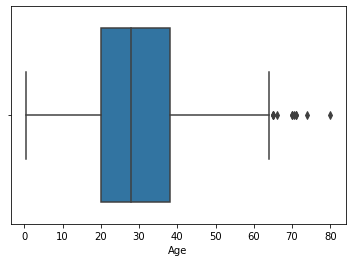

In [6]:
#boxplot
sns.boxplot(df['Age'])

In [7]:
#checking anomalies
df['Age'].describe()
##there is anomalies because it makes sense if someone is 80 years old

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [53]:
#outlier
df_age_notnull = df['Age'][df['Age'].notnull()]

In [9]:
q1, q3 = np.percentile(df_age_notnull, [25,75])
print(q1,q3)

20.125 38.0


In [10]:
iqr = q3-q1
print(iqr)

17.875


In [11]:
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)

print(lower_bound)
print(upper_bound)

-6.6875
64.8125


# TASK

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

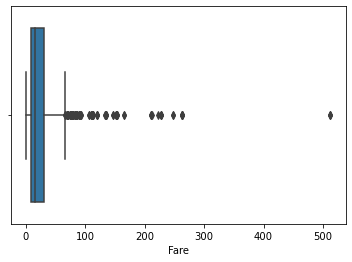

In [12]:
#boxplot
sns.boxplot(df['Fare'])

# OUTLIER
- Using IQR

IQR tells how spread the middle values are. It can be used to tell when a value is too far from the middle. 
An outlier is a point which falls more than 1.5 times the interquartile range above the third quartile or below the first quartile. 
- Step 1: Arrange the data in incresing order
- Step 2: Calculate first (q1) and third quartile (q3) 
- Step 3: find interquartile range (q3-q1)
- Step 4: Find lower bound (q1*1.5)
- Step 5: Find upper bound (q3*1.5)

Anything that lies outside of lower and upper bound is an outlier

In [52]:
#outlier
df_Fare_notnull = df['Fare'][df['Fare'].notnull()]

In [14]:
q1, q3 = np.percentile(df_Fare_notnull, [25,75])
print(q1,q3)

7.9104 31.0


In [15]:
iqr = q3-q1
print(iqr)

23.0896


In [16]:
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)

print(lower_bound)
print(upper_bound)

-26.724
65.6344


In [42]:
#data kelompok
data = pd.read_csv("C:/Users/HP/Documents/DS B/kelompok2.csv")
data

,Nama,Usia,TB,BB
0,Jaza,22,170,75
1,Irvan,20,170,60
2,Risma,21,155,57
3,Rizal,21,176,51
4,Shafira,21,154,56


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TB'>

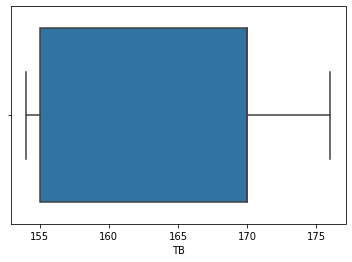

In [18]:
#boxplot
sns.boxplot(data['TB'])

In [19]:
data_TB_notnull = data['TB'][data['TB'].notnull()]
qu1, qu3 = np.percentile(data_TB_notnull, [25,75])
print(qu1,qu3)

155.0 170.0


In [20]:
iqr = qu3-qu1
print(iqr)

15.0


In [26]:
lower_bound = qu1 - (1.5*iqr)
upper_bound = qu3 + (1.5*iqr)

print(lower_bound)
print(upper_bound)

132.5
192.5


# TASK

In [24]:
##handling outlier
df_fare_new = df['Fare'][(df['Fare'] > lower_bound) & (df['Fare'] < upper_bound)]
print(df_fare_new)

31     146.5208
195    146.5208
268    153.4625
269    135.6333
297    151.5500
305    151.5500
318    164.8667
319    134.5000
325    135.6333
332    153.4625
334    133.6500
337    134.5000
373    135.6333
498    151.5500
609    153.4625
660    133.6500
708    151.5500
856    164.8667
Name: Fare, dtype: float64


In [25]:
df_fare_new.describe()

count     18.000000
mean     146.253467
std       10.553834
min      133.650000
25%      135.633300
50%      149.035400
75%      152.984375
max      164.866700
Name: Fare, dtype: float64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

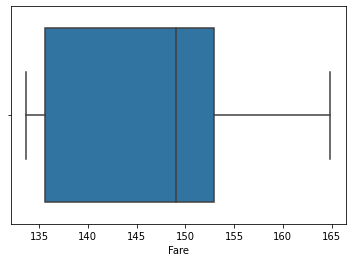

In [29]:
sns.boxplot(df_fare_new)

# Handling missing value
Missing values are usually represented in the form of Nan or null or None in the dataset.
In this case, we will be filling the missing values with a certain number. The possible ways to do this are:
- Filling the missing data with the mean or median value if it’s a numerical variable.
- Filling the missing data with mode if it’s a categorical value.
- Filling the numerical value with 0 or -999, or some other number that will not occur in the data. This can be done so that the machine can recognize that the data is not real or is different.
- Filling the categorical value with a new type for the missing values.
You can use the fillna() function to fill the null values in the dataset.


# numerical

In [34]:
df['Age'].isna().sum()

177

<AxesSubplot:ylabel='Frequency'>

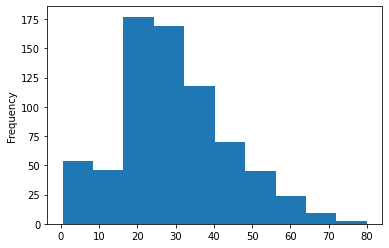

In [35]:
df['Age'].plot(kind='hist')

In [36]:
val = df['Age'].median()
df['Age'] = df['Age'].fillna(val)

In [37]:
df['Age'].isna().sum()

0

# categorical

In [38]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [39]:
df.Embarked.isna().sum()

2

In [40]:
val = df['Embarked'].mode()
df['Embarked'] = df['Embarked'].fillna(val)

In [41]:
df['Embarked'].isna().sum()

2

TASK

In [43]:
dk2 = pd.read_csv('Kelompok 2 - Sheet3.csv')
dk2.head()

,Nama,TB,BB,Gender
0,Jaza,170.0,75.0,NaN
1,Irvan,NaN,60.0,Male
2,Risma,155.0,57.0,Female
3,Rizal,176.0,NaN,Male
4,Shafira,154.0,56.0,Female


In [44]:
#categorical
dk2['Gender'].value_counts()

Male      2
Female    2
Name: Gender, dtype: int64

In [45]:
dk2.Gender.isna().sum()

1

In [46]:
val = dk2.Gender.mode().values[0]
dk2['Gender'] = dk2.Gender.fillna(val)
dk2['Gender'].isna().sum()

0

In [47]:
dk2['Gender'].value_counts()

Female    3
Male      2
Name: Gender, dtype: int64

In [48]:
#numerik
dk2['TB'].isna().sum()

1

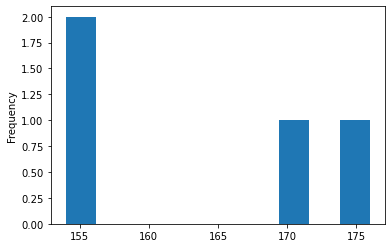

In [49]:
dk2['TB'].plot(kind='hist');

In [50]:
val = dk2['TB'].median()
dk2['TB'] = dk2['TB'].fillna(val)

In [51]:
dk2['TB'].isna().sum()

0